##### Projet CO2 par Polina, Vincent, Denis

Ce notebook:
entraine un modèle de classification pour prédiction par random forest

Prend en entrée les fichiers:
    (processed)/X_test_scaled.csv, X_train_scaled.csv, y_test_cat.csv, y_train_cat.csv : les données scalées et donc forcément préalablement séparées en jeux de train/test.

Fournit en sortie les fichiers:

    (models)/<nom_de_modele>.pkl


# Initialisation de variables et fonctions

In [3]:
# charge les chemins vers les fichiers de données : base_processed, base_raw, base_models...
%run init_notebook.py

random_state = 42
n_jobs = -1

In [4]:
# On importe les fonctions utiles à plusieurs modèles
import sys
sys.path.append('../')
from common_co2 import load_our_data_cat, display_norm_matrix, display_roc, adjust_with_penalty, check_differences

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import f1_score, recall_score



In [5]:
import os
os.environ["LOKY_MAX_CPU_COUNT"] = "16"  # nombre de cœurs physiques réels


In [6]:
X_train_scaled, X_test_scaled, y_train, y_test=load_our_data_cat()

In [7]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import f1_score, recall_score


# on reçoit le classifier et les données d'entraînement
def train_random_forest_model(random_forest_model, X_train_scaled, y_train):
    # Entraîner le modèle
    random_forest_model.fit(X_train_scaled, y_train)
    return random_forest_model

# on calcule et affiche les performances du modèle
def evaluate_random_forest_model(random_forest_model, X_test_scaled, y_test):
    # Prédire les classes sur les données de test
    y_pred = random_forest_model.predict(X_test_scaled)

    # Évaluer les performances du modèle
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Précision du modèle Random Forest : {accuracy:.4f}")

    # Afficher un rapport de classification
    print("Rapport de classification :")
    print(classification_report(y_test, y_pred))

    # Afficher la matrice de confusion
    print("Matrice de confusion :")
    print(confusion_matrix(y_test, y_pred))

    # Calcul et affichage du F1-score
    f1 = f1_score(y_test, y_pred, average='weighted')
    print(f"\nF1-Score : {f1:.4f}")

    # Calcul et affichage du rappel (recall)
    recall = recall_score(y_test, y_pred, average='weighted')
    print(f"Recall : {recall:.4f}")

    return accuracy, f1, recall, y_pred


# Classification par Random Forest

In [6]:
# hyperparamètres du modèle


n_estimators = 100

max_features= 'sqrt' # nombre de caractéristiques à considérer pour chaque split. dqrt=racine du nbre de caracs
# max_features= 'log2' # est une alternative. Ou bien un nombre à choisir

random_state = random_state

# contrôle de chaque arbre
max_depth = 10 # profondeur maximale de l'arbre
min_samples_split = 2 # nombre minimum d'échantillons requis pour diviser un nœud interne
min_samples_leaf = 2 # nombre minimum d'échantillons requis pour être à un nœud feuille
max_leaf_nodes = None # nombre maximum de feuilles que peut avoir un arbre
bootstrap = True # méthode d'échantillonnage des observations pour construire les arbres
oob_score = False # out-of-bag estimate

# pondération des classes
class_weight = 'balanced' # 'balanced' (pèse les classes en fn de leur fréq) ou un diso de poids

# critere d'évaluation
criterion = 'gini' # critère de qualité de la division ('gini' ou 'entropy')

n_jobs=-1

In [7]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier

# Initialisation du modèle Random Forest avec nos hyperparamètres
model = RandomForestClassifier(
    n_estimators=n_estimators,
    max_features=max_features,
    random_state=random_state,
    max_depth=max_depth,
    min_samples_split=min_samples_split,
    min_samples_leaf=min_samples_leaf,
    max_leaf_nodes=max_leaf_nodes,
    bootstrap=bootstrap,
    oob_score=oob_score,
    class_weight=class_weight,
    criterion=criterion,
    n_jobs=n_jobs
)

In [8]:
model=train_random_forest_model(model, X_train_scaled, y_train)
accuracy, f1, recall, y_pred=evaluate_random_forest_model(model, X_test_scaled, y_test)

Précision du modèle Random Forest : 0.8091
Rapport de classification :
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00      2887
         2.0       0.55      0.88      0.68      1441
         3.0       0.86      0.71      0.78      6138
         4.0       0.75      0.79      0.77      5435
         5.0       0.82      0.76      0.79      5061
         6.0       0.79      0.87      0.83      2610
         7.0       0.90      0.96      0.93      1163

    accuracy                           0.81     24735
   macro avg       0.81      0.85      0.82     24735
weighted avg       0.82      0.81      0.81     24735

Matrice de confusion :
[[2883    4    0    0    0    0    0]
 [   2 1267  158   11    3    0    0]
 [   5 1017 4335  755   25    1    0]
 [   4   19  543 4283  583    3    0]
 [   1    3   13  627 3848  547   22]
 [   1    0    0    2  227 2275  105]
 [   0    0    0    0    1   41 1121]]

F1-Score : 0.8103
Recall : 0.8091


Ce n'est pas très bon.  
On va essayer les paramètres du random forest qui avaient bien performé en regression.  
C'était celui-ci: RandomForestRegressor(min_samples_leaf=3, min_samples_split=6, max_depth=20, n_estimators=100, random_state=42)  
( voir 5.1_model_denis.ipynb )  


# Application des meilleurs paramètres trouvés en régression

In [ ]:
# Initialisation du modèle Random Forest avec nos hyperparamètres
model = RandomForestClassifier(
    n_estimators=100,
    max_features='sqrt',
    random_state=random_state,
    max_depth=20,
    min_samples_split=6,
    min_samples_leaf=3,
    max_leaf_nodes=None,
    bootstrap=True,
    oob_score=False,
    class_weight='balanced',
    criterion='gini',
    n_jobs=n_jobs
)

In [18]:
model=train_random_forest_model(model, X_train_scaled, y_train)
accuracy, f1, recall, y_pred=evaluate_random_forest_model(model, X_test_scaled, y_test)

Précision du modèle Random Forest : 0.8843
Rapport de classification :
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00      2887
         2.0       0.69      0.90      0.78      1441
         3.0       0.91      0.83      0.87      6138
         4.0       0.84      0.88      0.86      5435
         5.0       0.91      0.85      0.88      5061
         6.0       0.88      0.91      0.89      2610
         7.0       0.91      0.98      0.94      1163

    accuracy                           0.88     24735
   macro avg       0.88      0.91      0.89     24735
weighted avg       0.89      0.88      0.88     24735

Matrice de confusion :
[[2883    4    0    0    0    0    0]
 [   2 1299  139    1    0    0    0]
 [   5  564 5099  467    3    0    0]
 [   5    3  361 4790  276    0    0]
 [   1    2    3  439 4282  312   22]
 [   1    0    0    1  125 2387   96]
 [   0    0    0    0    1   28 1134]]

F1-Score : 0.8850
Recall : 0.8843


C'est bien meilleur.  
Et c'est équivalent aux perfs de la classification par modèle k_NN

# Représentations graphiques des résultats pour le rapport

In [78]:
name='Random Forest'
# params="estimateurs=100, max_features=sqrt, max_depth=20, min_samples_split=6, min_samples_leaf=3"
# hyperparams=f"random_state={model.get_params(["random_state"])},  etc..."
hyperparams = ", ".join(f"{key}={value}" for key, value in model.get_params().items())


🔹 Matrice de confusion pour Random Forest and bootstrap=True, ccp_alpha=0.0, class_weight=balanced, criterion=gini, max_depth=20, max_features=sqrt, max_leaf_nodes=None, max_samples=None, min_impurity_decrease=0.0, min_samples_leaf=3, min_samples_split=6, min_weight_fraction_leaf=0.0, monotonic_cst=None, n_estimators=100, n_jobs=-1, oob_score=False, random_state=42, verbose=0, warm_start=False🔹


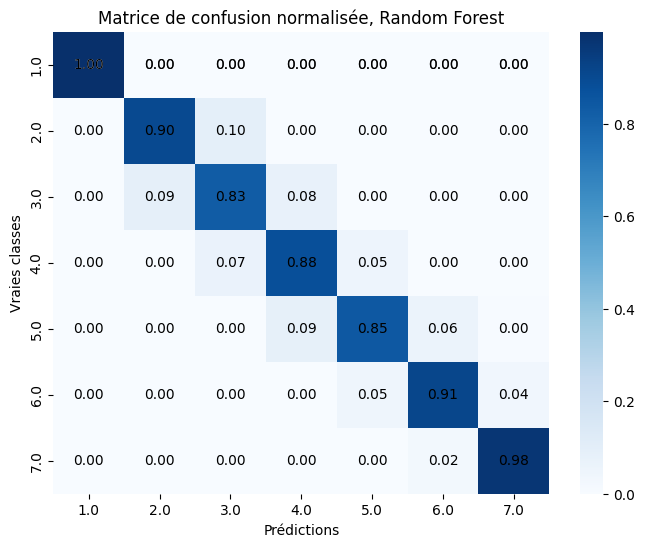

In [79]:
display_norm_matrix(name, y_pred, y_test, hyperparams=hyperparams)

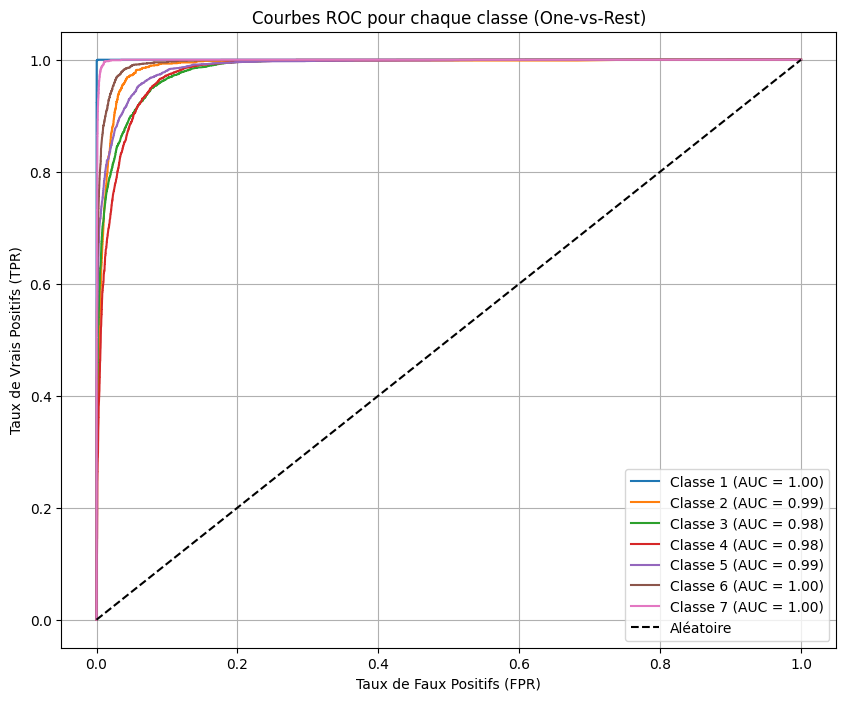

In [80]:
display_roc(X_test_scaled, y_test, y_pred, model)

On ne ressent pas pour ce modèle le besoin d'égaliser les classes sur le dataset d'entraînement  

# Tentatives d'optimisation par randomizedSearchCV

Nous allons voir si nous pouvons optimiser les hyperparamètres, car des paramètres optimisés pour une variable continue ne 
sont pas nécessairement les mêmes que pour une variable discrétionnaire.

In [81]:
import mlflow
import mlflow.sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score, make_scorer
from scipy.stats import randint

# Définir le modèle et l'espace de recherche
model = RandomForestClassifier(random_state=42)
# Définir l'espace de recherche pour les hyperparamètres
param_distributions = {
    'n_estimators': [50, 100,200],
    'max_depth': [15, 20, 30, 40],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [2, 4, 6, 8, 10],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [False, True],
    'criterion': ['gini', 'entropy'],
    'class_weight': [None, 'balanced']  # Pondération automatique des classes
}

# Configurer RandomizedSearchCV avec F1 comme métrique
scorer = make_scorer(f1_score, average='weighted')  # Pondéré pour la classification multi-classes
search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_distributions,
    n_iter=90,
    scoring=scorer,
    random_state=42,
    verbose=1
)


# Initialiser MLflow
mlflow.set_experiment("RF_exper_cat_02")

# Suivre et consigner les résultats intermédiaires
with mlflow.start_run():
    search.fit(X_train_scaled, y_train)  # Utilisation de vos données préchargées
    
    for i, params in enumerate(search.cv_results_['params']):
        # F1-Score moyen pour chaque itération
        mean_test_f1 = search.cv_results_['mean_test_score'][i]
        std_test_f1 = search.cv_results_['std_test_score'][i]

        # Enregistrer chaque itération dans MLflow
        with mlflow.start_run(nested=True):
            mlflow.log_params(params)
            mlflow.log_metric("mean_f1_score", mean_test_f1)
            mlflow.log_metric("std_f1_score", std_test_f1)

    # Enregistrer le meilleur modèle
    mlflow.log_params(search.best_params_)
    mlflow.log_metric("best_f1_score", search.best_score_)
    #mlflow.sklearn.log_model(search.best_estimator_, "best_model")

# Tester le meilleur modèle sur les données de test
best_model = search.best_estimator_
y_pred = best_model.predict(X_test_scaled)
test_f1_score = f1_score(y_test, y_pred, average='weighted')
mlflow.log_metric("test_f1_score", test_f1_score)


Fitting 5 folds for each of 90 candidates, totalling 450 fits


KeyboardInterrupt: 

 Résultat visible sur mlflow:  
 f1_score=0.887144  
 bootstrap=True  
 class_weight=None
 criterion=entropy  
 max_depth=20
 mas_feat=log2
 min_sample_leaf=2
 min_sample_s=5
 n_estimators=200


In [ ]:
# in case needed:
# mlflow.end_run()

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, f1_score, recall_score, classification_report
import mlflow
import mlflow.sklearn

# 1. Définir l'espace de recherche pour les hyperparamètres
param_distributions = {
    'n_estimators': [50, 100],
    'max_depth': [15, 20, 30, 40],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [2, 4, 6, 8, 10],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [False, True],
    'criterion': ['gini', 'entropy']
    'class_weight': [None, 'balanced']  # Pondération automatique des classes
}

# Initialiser le modèle de base
rf_model = RandomForestClassifier(
    random_state=random_state,
    class_weight=class_weight,
    n_jobs=n_jobs
)

# Initialiser RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_distributions,
    n_iter=50,  # Nombre d'itérations (expérimentations aléatoires)
    scoring='accuracy',  # Peut être ajusté selon la métrique choisie
    cv=3,  # Nombre de plis pour la validation croisée
    verbose=2,  # Affiche la progression
    random_state=random_state,
    n_jobs=-1  # Utilise tous les cœurs pour accélérer
)

mlflow.set_experiment("RF_exper_cat_01_temp01")

# Consigner les résultats intermédiaires dans MLflow
with mlflow.start_run(run_name="RF_cat_01_temp01"):
    # Effectuer la recherche d'hyperparamètres
    random_search.fit(X_train_scaled, y_train)

    # Enregistrer les meilleurs hyperparamètres dans MLflow
    best_params = random_search.best_params_
    mlflow.log_params(best_params)

    # Évaluer le modèle optimisé sur les données de test
    best_model = random_search.best_estimator_
    y_pred = best_model.predict(X_test_scaled)

    # Calculer les métriques
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')

    # Consigner les métriques dans MLflow
    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("f1_score", f1)
    mlflow.log_metric("recall", recall)

    # Enregistrer le modèle optimisé dans MLflow, quand on sera au point
    # mlflow.sklearn.log_model(best_model, "random_forest_model")

    # Optionnel : Afficher les résultats dans la console
    print("Best Hyperparameters:", best_params)
    print(f"Accuracy: {accuracy:.2f}, F1-Score: {f1:.2f}, Recall: {recall:.2f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))


# Calcul de performances avec les meilleurs paramètres

In [10]:
from sklearn.ensemble import RandomForestClassifier

# meilleurs hyperparamètres issus de la recherche randomizedSearchCV ci-dessus:
# Initialisation du modèle Random Forest avec nos hyperparamètres
model = RandomForestClassifier(
    n_estimators=100,
    max_features='sqrt',
    random_state=random_state,
    max_depth=20,
    min_samples_split=2,
    min_samples_leaf=2,
    max_leaf_nodes=None,
    bootstrap=True,
    oob_score=False,
    class_weight='balanced',
    criterion='gini',
    n_jobs=n_jobs
)

In [11]:
model=train_random_forest_model(model, X_train_scaled, y_train)
accuracy, f1, recall, y_pred=evaluate_random_forest_model(model, X_test_scaled, y_test)

Précision du modèle Random Forest : 0.8863
Rapport de classification :
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00      2887
         2.0       0.70      0.89      0.79      1441
         3.0       0.91      0.83      0.87      6138
         4.0       0.84      0.88      0.86      5435
         5.0       0.91      0.85      0.88      5061
         6.0       0.88      0.91      0.90      2610
         7.0       0.91      0.97      0.94      1163

    accuracy                           0.89     24735
   macro avg       0.88      0.91      0.89     24735
weighted avg       0.89      0.89      0.89     24735

Matrice de confusion :
[[2883    4    0    0    0    0    0]
 [   2 1283  155    0    1    0    0]
 [   5  534 5122  475    2    0    0]
 [   4    3  349 4808  270    0    1]
 [   1    1    2  433 4325  281   18]
 [   1    0    0    1  142 2374   92]
 [   0    0    0    0    1   34 1128]]

F1-Score : 0.8869
Recall : 0.8863


Aller faire des représentations graphiques pour le rapport si besoin

# Tentative d'optimisation par pénalité

Exécuter le chapitre "Calcul de performances avec les meilleures hyperparamètres" avant de tenter l'optimisation ci-dessous.

In [41]:
# paramètres pour ce chapitre:
threshold = 0.012 # par exemple 0.1 pour 10% de favorisation

In [42]:
# Prédire les classes sur les données de test
y_prob = model.predict_proba(X_test_scaled)

y_adjusted_pred= adjust_with_penalty(y_prob,threshold)

In [43]:
from sklearn.metrics import accuracy_score, f1_score, recall_score

# Calculate new metrics
adjusted_accuracy = accuracy_score(y_test, y_adjusted_pred)
adjusted_f1 = f1_score(y_test, y_adjusted_pred, average='weighted')
adjusted_recall = recall_score(y_test, y_adjusted_pred, average='weighted')  # Include recall calculation

# Print the metrics
print(f"Adjusted Accuracy: {adjusted_accuracy:.4f}")
print(f"Adjusted F1-Score: {adjusted_f1:.4f}")
print(f"Adjusted Recall: {adjusted_recall:.4f}")


Adjusted Accuracy: 0.8862
Adjusted F1-Score: 0.8868
Adjusted Recall: 0.8862


In [44]:

differences, count_misadjustments, count_right_adjustments = check_differences(y_pred, y_adjusted_pred, y_test)
display(differences)
print("\nCount of misadjustments (real_3 to 2):      ", count_misadjustments)
print("Count of rightful adjustments (real_2 to 2):", count_right_adjustments)

,Original Prediction,Adjusted Prediction,Actual Test Label,Difference
4371,3.0,2,3.0,True
4592,3.0,2,2.0,True
9840,3.0,2,2.0,True
10570,3.0,2,3.0,True
13433,3.0,2,3.0,True
18069,3.0,2,3.0,True
22064,3.0,2,3.0,True



Count of misadjustments (real_3 to 2):       5
Count of rightful adjustments (real_2 to 2): 2


Ici, on remarque que dès les premières lignes affectées par la pénalité, on commence à classer des lignes de classe réelles 3 en classe 2, donc cela explique qu'on n'améliore pas la performance avec la pénalité.

Puis faire des représentations graphiques pour le rapport

# Représentations graphiques des résultats pour le rapport

In [45]:
name='Random Forest'
hyperparams = ", ".join(f"{key}={value}" for key, value in model.get_params().items())
hyperparams += f", pénalité de {threshold*100}% classes 3->2"



🔹 Matrice de confusion pour Random Forest and bootstrap=True, ccp_alpha=0.0, class_weight=balanced, criterion=gini, max_depth=20, max_features=sqrt, max_leaf_nodes=None, max_samples=None, min_impurity_decrease=0.0, min_samples_leaf=2, min_samples_split=2, min_weight_fraction_leaf=0.0, monotonic_cst=None, n_estimators=100, n_jobs=-1, oob_score=False, random_state=42, verbose=0, warm_start=False, pénalité de 1.2% classes 3->2🔹


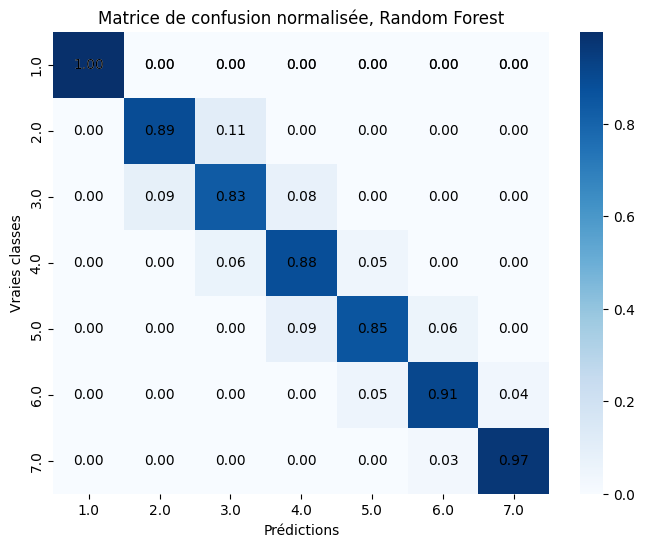

In [46]:
# attention à utiliser y_pred ou y_adjusted_pred selon le besoin
display_norm_matrix(name, y_pred, y_test, hyperparams=hyperparams)

# Interprêtabilité des résultats

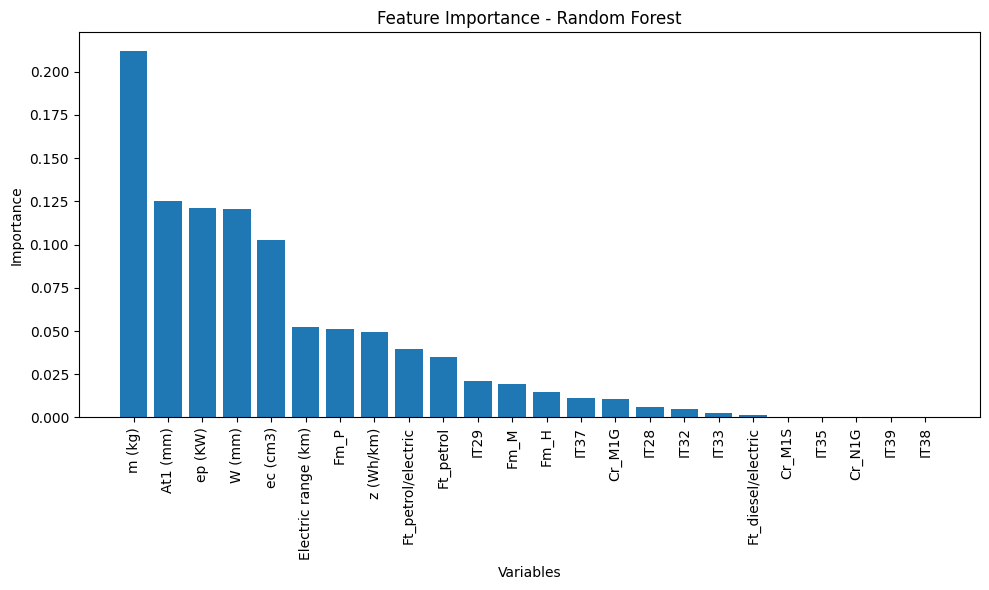

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Exemple : supposons que votre modèle Random Forest est déjà entraîné
# rf_model = RandomForestClassifier().fit(X_train, y_train)

# Extraction des importances des variables
importances = model.feature_importances_
feature_names = X_test_scaled.columns  # Les noms des colonnes de vos données

# Création d'un graphique
indices = np.argsort(importances)[::-1]  # Tri des importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), feature_names[indices], rotation=90)
plt.xlabel("Variables")
plt.ylabel("Importance")
plt.title("Feature Importance - Random Forest")
plt.tight_layout()
plt.show()

# Sauvegarde du dernier modèle utilisé

In [48]:
import joblib

# Chemin pour enregistrer le modèle
model_path = base_models + 'rf_cat.pkl'

# Enregistrer le modèle
joblib.dump(model, model_path)

print(f"Modèle random_forest pour classification enregistré dans {model_path}")


Modèle random_forest pour classification enregistré dans ../models/rf_cat.pkl
